In [ ]:
!pip install newsapi-python

In [ ]:
!pip install yfinance

In [ ]:
from newsapi import NewsApiClient
from newsapi import NewsApiClient
from datetime import date, timedelta

phrase = 'Apple stock'
newsapi = NewsApiClient(api_key='39da8cd4223241eb865fdede97dd9580')
my_date = date.today() - timedelta(days = 7)
articles = newsapi.get_everything(q=phrase,
                                  from_param = my_date.isoformat(),
                                  language="en",
                                  sort_by="relevancy",
                                  page_size = 5)
for article in articles['articles']:
  print(article['title']+ ' | ' + article['publishedAt'] + ' | ' + article['url'])
articles = newsapi.get_everything(q=phrase,
                                  from_param = my_date.isoformat(),
                                  language="en",
                                  sort_by="relevancy",
                                  page_size = 5)
for article in articles['articles']:
  print(article['title']+ ' | ' + article['publishedAt'] + ' | ' + article['url'])

Amazon Is Clearing Out the Apple Watch SE (2nd Gen) at Black Friday Prices, Perfect for a Mother’s Day Tech Gift | 2025-05-08T14:55:08Z | https://gizmodo.com/amazon-is-clearing-out-the-apple-watch-se-2nd-gen-at-black-friday-prices-perfect-for-a-mothers-day-tech-gift-2000599312
Don’t Buy the New iPad From Apple’s Website, Amazon Is Offering a Shockingly Low Price Right Now | 2025-05-11T12:40:46Z | https://gizmodo.com/dont-buy-the-new-ipad-from-apples-website-amazon-is-offering-a-shockingly-low-price-right-now-2000600738
Apple says searches are shrinking because people are using AI instead. Now Google's stock is tanking. | 2025-05-07T16:16:30Z | https://www.businessinsider.com/apple-says-ai-disrupts-search-market-google-impact-2025-5
Amazon Is Slashing Prices on the Latest iPad 11, Now Cheaper Than the iPad From Two Generations Ago | 2025-05-08T17:06:48Z | https://gizmodo.com/amazon-is-slashing-prices-on-the-latest-ipad-11-now-cheaper-than-the-ipad-from-two-generations-ago-2000599763
Goo

In [ ]:
import sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
pd.set_option('display.max_colwidth',1000)

In [ ]:
def get_sources(category = None):
  newsapi = NewsApiClient(api_key='39da8cd4223241eb865fdede97dd9580')
  sources = newsapi.get_sources()
  if category is not None:
    rez = [source['id'] for source in sources['sources'] if source['category'] == category and source['language'] == 'en']
  else:
    rez = [source['id'] for source in sources['sources'] if source['language'] == 'en']

  return rez

In [ ]:
len(get_sources())

80

In [ ]:
get_sources('business')

['australian-financial-review',
 'bloomberg',
 'business-insider',
 'financial-post',
 'fortune',
 'the-wall-street-journal']

In [ ]:
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
  newsapi = NewsApiClient(api_key='39da8cd4223241eb865fdede97dd9580')
  if type(startd)== str :
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  #If the sources list is provided - use it
  if sources_list:
    articles = newsapi.get_everything(q = keywrd, from_param = my_date.isoformat(), to = (my_date + timedelta(days = 1)).isoformat(), language="en", sources = ",".join(sources_list), sort_by="relevancy", page_size = 100)
  else:
    articles = newsapi.get_everything(q = keywrd, from_param = my_date.isoformat(),to = (my_date + timedelta(days = 1)).isoformat(), language="en", sort_by="relevancy", page_size = 100)
  article_content = ''
  date_sentiments = {}
  date_sentiments_list = []
  seen = set()
  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
    article_content = str(article['title']) + '. ' + str(article['description'])
    #Get the sentiment score
    sentiment = sia.polarity_scores(article_content)['compound']

    date_sentiments.setdefault(my_date, []).append(sentiment)
    date_sentiments_list.append((sentiment, article['url'], article['title'],article['description']))

Amazon Is Clearing Out the Apple Watch SE (2nd Gen) at Black Friday Prices, Perfect for a Mother’s Day Tech Gift | 2025-05-08T14:55:08Z | https://gizmodo.com/amazon-is-clearing-out-the-apple-watch-se-2nd-gen-at-black-friday-prices-perfect-for-a-mothers-day-tech-gift-2000599312
Don’t Buy the New iPad From Apple’s Website, Amazon Is Offering a Shockingly Low Price Right Now | 2025-05-11T12:40:46Z | https://gizmodo.com/dont-buy-the-new-ipad-from-apples-website-amazon-is-offering-a-shockingly-low-price-right-now-2000600738
Apple says searches are shrinking because people are using AI instead. Now Google's stock is tanking. | 2025-05-07T16:16:30Z | https://www.businessinsider.com/apple-says-ai-disrupts-search-market-google-impact-2025-5
Amazon Is Slashing Prices on the Latest iPad 11, Now Cheaper Than the iPad From Two Generations Ago | 2025-05-08T17:06:48Z | https://gizmodo.com/amazon-is-slashing-prices-on-the-latest-ipad-11-now-cheaper-than-the-ipad-from-two-generations-ago-2000599763
Goo

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0.08808556701030927
97
0                                                                                                                                 Venture capital's hopes of more deals and liquidity this year seem unlikely as uncertainty in the stock market continues, says PitchBook.
1                                                                                                             STORY: :: Denmark is rebuilding its historic stock exchange, destroyed by a fire a year ago:: April 16, 2024:: Copenhagen, Denmark:: April 15, 2025:: Lars...
2                                                                                                                                                                                                                               Fitting for a CEO who loves to play martyr.
3                                                                                                                                                                            

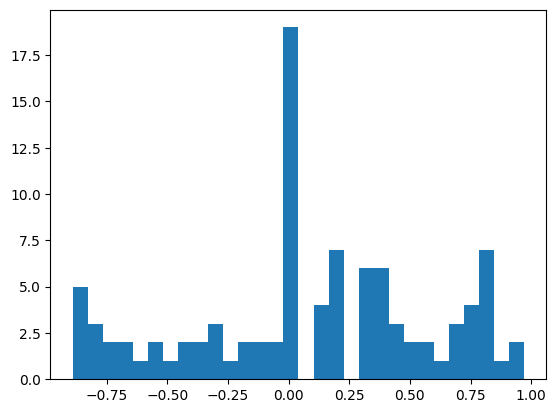

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install newsapi-python
# %%
!pip install yfinance
# %%
from newsapi import NewsApiClient
from newsapi import NewsApiClient
from datetime import date, timedelta

phrase = 'Apple stock'
newsapi = NewsApiClient(api_key='39da8cd4223241eb865fdede97dd9580')
my_date = date.today() - timedelta(days = 7)
articles = newsapi.get_everything(q=phrase,
                                  from_param = my_date.isoformat(),
                                  language="en",
                                  sort_by="relevancy",
                                  page_size = 5)
for article in articles['articles']:
  print(article['title']+ ' | ' + article['publishedAt'] + ' | ' + article['url'])
articles = newsapi.get_everything(q=phrase,
                                  from_param = my_date.isoformat(),
                                  language="en",
                                  sort_by="relevancy",
                                  page_size = 5)
for article in articles['articles']:
  print(article['title']+ ' | ' + article['publishedAt'] + ' | ' + article['url'])
# %%
import sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
# %%
pd.set_option('display.max_colwidth',1000)
# %%
def get_sources(category = None):
  newsapi = NewsApiClient(api_key='39da8cd4223241eb865fdede97dd9580')
  sources = newsapi.get_sources()
  if category is not None:
    rez = [source['id'] for source in sources['sources'] if source['category'] == category and source['language'] == 'en']
  else:
    rez = [source['id'] for source in sources['sources'] if source['language'] == 'en']

  return rez
# %%
len(get_sources())
# %%
get_sources('business')
# %%
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
  newsapi = NewsApiClient(api_key='39da8cd4223241eb865fdede97dd9580')
  if type(startd)== str :
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  #If the sources list is provided - use it
  if sources_list:
    articles = newsapi.get_everything(q = keywrd, from_param = my_date.isoformat(), to = (my_date + timedelta(days = 1)).isoformat(), language="en", sources = ",".join(sources_list), sort_by="relevancy", page_size = 100)
  else:
    articles = newsapi.get_everything(q = keywrd, from_param = my_date.isoformat(),to = (my_date + timedelta(days = 1)).isoformat(), language="en", sort_by="relevancy", page_size = 100)
  article_content = ''
  date_sentiments = {}
  date_sentiments_list = []
  seen = set()
  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
    article_content = str(article['title']) + '. ' + str(article['description'])
    #Get the sentiment score
    sentiment = sia.polarity_scores(article_content)['compound']

    date_sentiments.setdefault(my_date, []).append(sentiment)
    date_sentiments_list.append((sentiment, article['url'], article['title'],article['description']))

  # Return a pandas DataFrame from the list of sentiments and article info
  return pd.DataFrame(date_sentiments_list, columns=['Sentiment', 'URL', 'Title', 'Description'])

# %%
return_articles = get_articles_sentiments(keywrd= 'stock', startd = (date.today() - timedelta(days = 29)).strftime('%d-%b-%Y'), sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30,grid=False)

print(return_articles.Sentiment.mean())
print(return_articles.Sentiment.count())
print(return_articles.Description)
# %%

In [ ]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL']].head(2)

,Sentiment,URL
53,-0.8885,https://www.windowscentral.com/hardware/laptops/pc-shipments-surge-as-windows-11-adoption-rises-but-the-trade-war-threatens-momentum
1,-0.8807,https://www.yahoo.com/news/denmark-starts-rebuilding-historic-stock-201307177.html


Amazon Is Clearing Out the Apple Watch SE (2nd Gen) at Black Friday Prices, Perfect for a Mother’s Day Tech Gift | 2025-05-08T14:55:08Z | https://gizmodo.com/amazon-is-clearing-out-the-apple-watch-se-2nd-gen-at-black-friday-prices-perfect-for-a-mothers-day-tech-gift-2000599312
Don’t Buy the New iPad From Apple’s Website, Amazon Is Offering a Shockingly Low Price Right Now | 2025-05-11T12:40:46Z | https://gizmodo.com/dont-buy-the-new-ipad-from-apples-website-amazon-is-offering-a-shockingly-low-price-right-now-2000600738
Apple says searches are shrinking because people are using AI instead. Now Google's stock is tanking. | 2025-05-07T16:16:30Z | https://www.businessinsider.com/apple-says-ai-disrupts-search-market-google-impact-2025-5
Amazon Is Slashing Prices on the Latest iPad 11, Now Cheaper Than the iPad From Two Generations Ago | 2025-05-08T17:06:48Z | https://gizmodo.com/amazon-is-slashing-prices-on-the-latest-ipad-11-now-cheaper-than-the-ipad-from-two-generations-ago-2000599763
Goo

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0.157013
100
0     If you don’t have a Nintendo Switch 2 preorder, Best Buy might still be able to help you get a console on launch day. For the retailer’s midnight openings for the Switch 2 launch, “most stores will have limited inventory of systems, games, and accessories for…
1                                                                                                                                                                                                             For around $100, you get a very good 27-inch gaming monitor.
2                                                                                                                                                                                              You can score these over-the-ear headphones for 51% off if you act quickly.
3                                                                                                                                                                                         

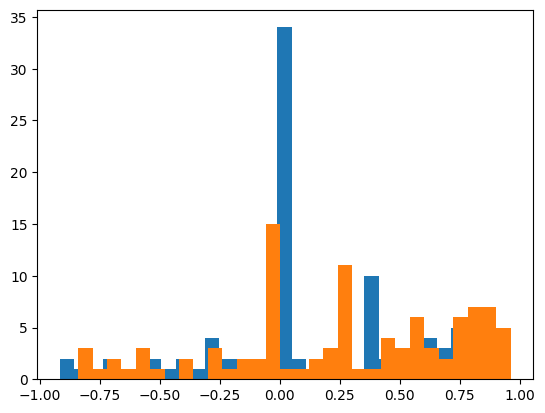

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install newsapi-python
# %%
!pip install yfinance
# %%
from newsapi import NewsApiClient
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime # Import datetime

phrase = 'Apple stock'
newsapi = NewsApiClient(api_key='39da8cd4223241eb865fdede97dd9580')
my_date = date.today() - timedelta(days = 7)
articles = newsapi.get_everything(q=phrase,
                                  from_param = my_date.isoformat(),
                                  language="en",
                                  sort_by="relevancy",
                                  page_size = 5)
for article in articles['articles']:
  print(article['title']+ ' | ' + article['publishedAt'] + ' | ' + article['url'])
articles = newsapi.get_everything(q=phrase,
                                  from_param = my_date.isoformat(),
                                  language="en",
                                  sort_by="relevancy",
                                  page_size = 5)
for article in articles['articles']:
  print(article['title']+ ' | ' + article['publishedAt'] + ' | ' + article['url'])
# %%
import sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
# %%
pd.set_option('display.max_colwidth',1000)
# %%
def get_sources(category = None):
  newsapi = NewsApiClient(api_key='39da8cd4223241eb865fdede97dd9580')
  sources = newsapi.get_sources()
  if category is not None:
    rez = [source['id'] for source in sources['sources'] if source['category'] == category and source['language'] == 'en']
  else:
    rez = [source['id'] for source in sources['sources'] if source['language'] == 'en']

  return rez
# %%
len(get_sources())
# %%
get_sources('business')
# %%
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
  newsapi = NewsApiClient(api_key='39da8cd4223241eb865fdede97dd9580')
  if type(startd)== str :
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  #If the sources list is provided - use it
  if sources_list:
    articles = newsapi.get_everything(q = keywrd, from_param = my_date.isoformat(), to = (my_date + timedelta(days = 1)).isoformat(), language="en", sources = ",".join(sources_list), sort_by="relevancy", page_size = 100)
  else:
    articles = newsapi.get_everything(q = keywrd, from_param = my_date.isoformat(),to = (my_date + timedelta(days = 1)).isoformat(), language="en", sort_by="relevancy", page_size = 100)
  article_content = ''
  date_sentiments = {}
  date_sentiments_list = []
  seen = set()
  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
    article_content = str(article['title']) + '. ' + str(article['description'])
    #Get the sentiment score
    sentiment = sia.polarity_scores(article_content)['compound']

    date_sentiments.setdefault(my_date, []).append(sentiment)
    date_sentiments_list.append((sentiment, article['url'], article['title'],article['description']))

  # Return a pandas DataFrame from the list of sentiments and article info
  return pd.DataFrame(date_sentiments_list, columns=['Sentiment', 'URL', 'Title', 'Description'])

# %%
# Using a date within the allowed range (e.g., today minus a few days or the date specified in the error message if it's in the past but allowed)
# Let's use a date after 2025-04-13. Using today's date minus a few days is a safe bet.
# However, to directly address the error about '2020-07-21' being too old,
# we'll change the date in the call that caused the error to a valid date.
# Assuming the current date is after 2025-04-13, using a recent date is appropriate.
return_articles = get_articles_sentiments(keywrd= 'stock', startd = (date.today() - timedelta(days = 2)).strftime('%d-%b-%Y'), sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30,grid=False)

print(return_articles.Sentiment.mean())
print(return_articles.Sentiment.count())
print(return_articles.Description)
# %%
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL']].head(2) # Corrected column indexing
# %%
sources = get_sources('business')
# Change the start date here to be within your API plan's allowed range.
# Using a date after '2025-04-13', for example, today minus a few days.
return_articles = get_articles_sentiments('stock',(date.today() - timedelta(days = 2)).strftime('%d-%b-%Y'),sources_list = sources, show_all_articles = True) # Corrected date
return_articles.Sentiment.hist(bins = 30, grid = False)

print(return_articles.Sentiment.mean())

print(return_articles.Sentiment.count())

print(return_articles.Description)

In [ ]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL']].head(2)


,Sentiment,URL
38,-0.8402,https://financialpost.com/pmn/business-pmn/asia-stocks-set-to-extend-rally-as-trade-war-cools-markets-wrap
32,-0.8225,https://financialpost.com/investing/microsoft-tariff-haven-chaos


In [ ]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL']].tail(2)


,Sentiment,URL
25,0.9524,https://financialpost.com/pmn/business-wire-news-releases-pmn/superior-plus-reports-voting-results-of-annual-and-special-meeting-of-shareholders-2
86,0.9623,https://financialpost.com/globe-newswire/village-farms-internationals-q1-25-results-demonstrate-successful-focus-on-profitable-sales-and-international-expansion


0.26348080808080804
99
0                                                                                                                         Rep. Jared Moskowitz bought tens of thousands of dollars in stock in 20 different companies just two days before Trump announced a tariff pause.
1                                                                                                                            We spoke to retirees who planned to travel once they retired. However, financial concerns and rising costs are putting cracks in their plans.
2                                                                                                                                                         AMC is offering 50% off tickets for Stubs members starting in July following its success with Discount Tuesdays.
3                                                                                                                                                    Air Canada saw traffic fall

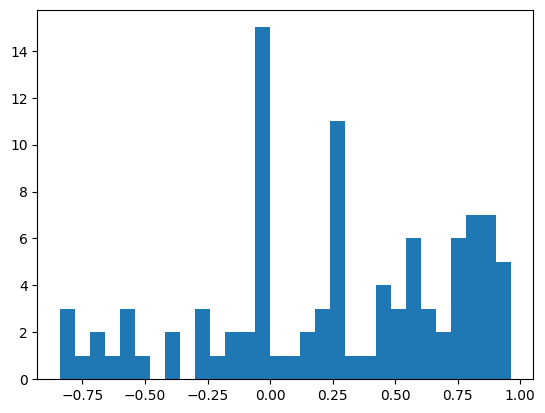

In [ ]:
sources = get_sources('business')
# Change the start date here to be within your API plan's allowed range (after 2025-04-13).
# Using today's date minus a few days is a safe bet.
return_articles = get_articles_sentiments('stock',(date.today() - timedelta(days = 2)).strftime('%d-%b-%Y'),sources_list = sources, show_all_articles = True) # Corrected date
return_articles.Sentiment.hist(bins = 30, grid = False)

print(return_articles.Sentiment.mean())

print(return_articles.Sentiment.count())

print(return_articles.Description)

np.float64(0.26426262626262625)

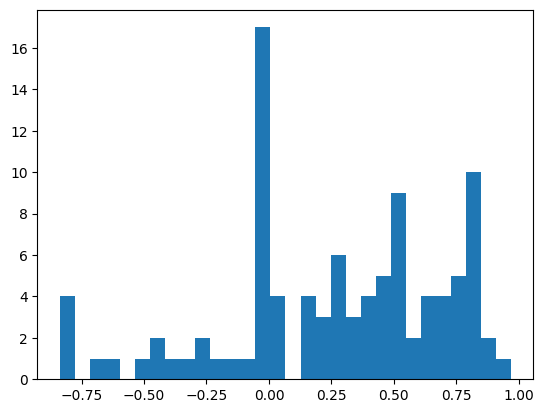

In [35]:
return_articles = get_articles_sentiments('stock','1-May-2025',show_all_articles=True)
return_articles.Sentiment.hist(bins = 30, grid = False)
return_articles.Sentiment.mean()

In [40]:
from datetime import date, timedelta
import pandas as pd

end_date = date.today()
start_date = date(end_date.year - 1, 12, end_date.day) if end_date.month == 1 else date(end_date.year, end_date.month - 1, end_date.day)

print('Start day =', start_date)
print('End day =', end_date)

current_day = start_date
business_sources = get_sources('business')
sentiment_all_score = []
sentiment_business_score = []
dates = []

while current_day <= end_date:
    print(f"Processing date: {current_day}")
    try:
        sentiments_all = get_articles_sentiments(
            keywrd='stock',
            startd=current_day,
            sources_list=None,
            show_all_articles=True
        )
        if sentiments_all is not None and 'Sentiment' in sentiments_all.columns:
            sentiments_all['Sentiment'] = pd.to_numeric(sentiments_all['Sentiment'], errors='coerce')
            sentiment_all_score.append(sentiments_all['Sentiment'].mean())
        else:
            sentiment_all_score.append(None)

        sentiments_business = get_articles_sentiments(
            keywrd='stock',
            startd=current_day,
            sources_list=business_sources,
            show_all_articles=True
        )
        if sentiments_business is not None and 'Sentiment' in sentiments_business.columns:
            sentiments_business['Sentiment'] = pd.to_numeric(sentiments_business['Sentiment'], errors='coerce')
            sentiment_business_score.append(sentiments_business['Sentiment'].mean())
        else:
            sentiment_business_score.append(None)

    except Exception as e:
        print(f"Error on {current_day}: {e}")
        sentiment_all_score.append(None)
        sentiment_business_score.append(None)

    dates.append(current_day)
    current_day += timedelta(days=1)


Start day = 2025-04-14
End day = 2025-05-14
Processing date: 2025-04-14
Processing date: 2025-04-15
Processing date: 2025-04-16
Processing date: 2025-04-17
Processing date: 2025-04-18
Processing date: 2025-04-19
Processing date: 2025-04-20
Processing date: 2025-04-21
Processing date: 2025-04-22
Processing date: 2025-04-23
Processing date: 2025-04-24
Processing date: 2025-04-25
Processing date: 2025-04-26
Processing date: 2025-04-27
Processing date: 2025-04-28
Processing date: 2025-04-29
Processing date: 2025-04-30
Processing date: 2025-05-01
Processing date: 2025-05-02
Processing date: 2025-05-03
Processing date: 2025-05-04
Processing date: 2025-05-05
Processing date: 2025-05-06
Processing date: 2025-05-07
Processing date: 2025-05-08
Processing date: 2025-05-09
Processing date: 2025-05-10
Processing date: 2025-05-11
Processing date: 2025-05-12
Processing date: 2025-05-13
Processing date: 2025-05-14


In [41]:
sentiments = pd.DataFrame([dates,np.array(sentiment_all_score),np.array(sentiment_business_score)]).transpose()

sentiments.columns =['Date','All_sources_sentiment','Business_sources_sentiment']

sentiments['Date'] = pd.to_datetime(sentiments['Date'])

sentiments['All_sources_sentiment'] = sentiments['All_sources_sentiment'].astype(float)
sentiments['Business_sources_sentiment'] = sentiments['Business_sources_sentiment'].astype(float)

In [45]:
sentiments.info()
# 2   Business_sources_sentiment  31 non-null  float64
# dtypes: datetime64[ns](1), float64(2)
# memory usage: 872.0 bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        31 non-null     datetime64[ns]
 1   All_sources_sentiment       30 non-null     float64       
 2   Business_sources_sentiment  30 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 876.0 bytes


In [46]:
sentiments.set_index("Date", inplace=True)

sentiments.head()

,All_sources_sentiment,Business_sources_sentiment
Date,,
2025-04-14,0.098983,0.126252
2025-04-15,0.088086,0.159869
2025-04-16,0.041924,0.157116
2025-04-17,0.144665,0.232738
2025-04-18,0.269085,0.148961


In [47]:
import pandas_datareader.data as pdr

end = date.today()
start = datetime(year=end.year, month=end.month-1, day=end.day)

print(f'Period 1 month until today: {start} to {end} ')

Period 1 month until today: 2025-04-14 00:00:00 to 2025-05-14 


In [50]:
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.index
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.index

DatetimeIndex(['2025-05-13', '2025-05-12', '2025-05-09', '2025-05-08',
               '2025-05-07', '2025-05-06', '2025-05-05', '2025-05-02',
               '2025-05-01', '2025-04-30', '2025-04-29', '2025-04-28',
               '2025-04-25', '2025-04-24', '2025-04-23', '2025-04-22',
               '2025-04-21', '2025-04-17', '2025-04-16', '2025-04-15',
               '2025-04-14'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [51]:
sentiments_vs_snp = sentiments.join(spx_index['Close']).dropna()
sentiments_vs_snp.rename(columns={'Close':'s&p500_close'}, inplace=True)
sentiments_vs_snp.head()

,All_sources_sentiment,Business_sources_sentiment,s&p500_close
Date,,,
2025-04-14,0.098983,0.126252,5405.97
2025-04-15,0.088086,0.159869,5396.63
2025-04-16,0.041924,0.157116,5275.70
2025-04-17,0.144665,0.232738,5282.70
2025-04-21,0.112810,0.160224,5158.20


<Axes: xlabel='Date', ylabel='All_sources_sentiment'>

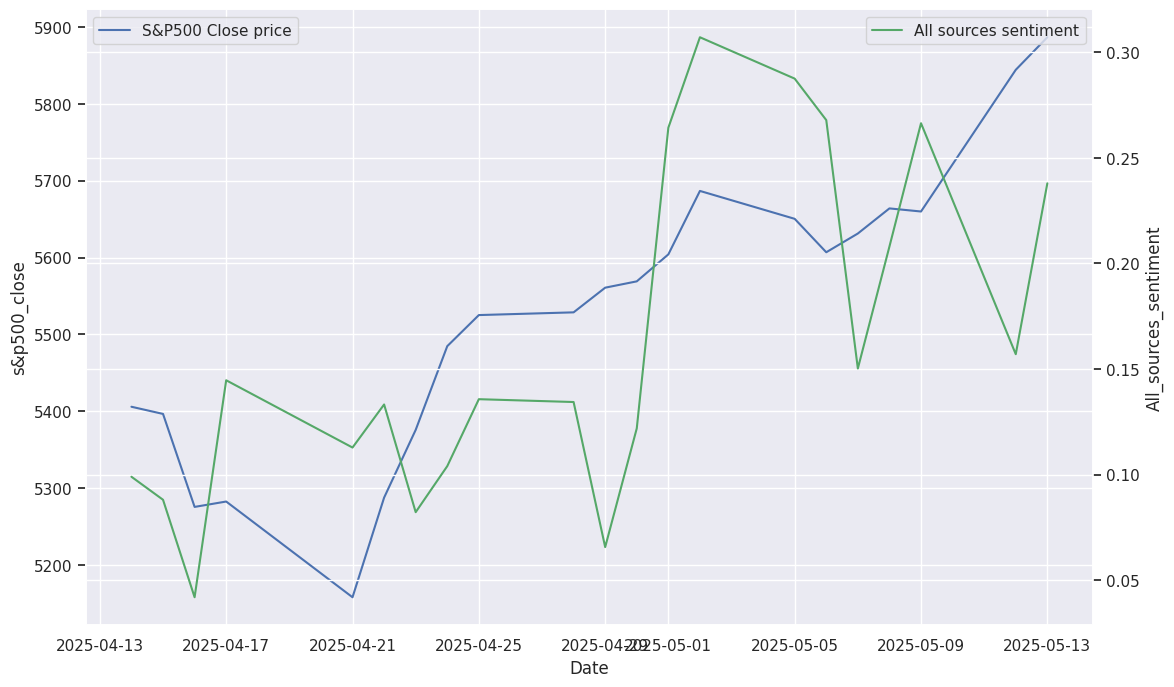

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(13.0,8.0)})
ax=sns.lineplot(data=sentiments_vs_snp['s&p500_close'], color="b",label='S&P500 Close price')
ax2 = plt.twinx()
sns.lineplot(data=sentiments_vs_snp["All_sources_sentiment"], color="g", ax=ax2, label='All sources sentiment')

<Axes: xlabel='Date', ylabel='Business_sources_sentiment'>

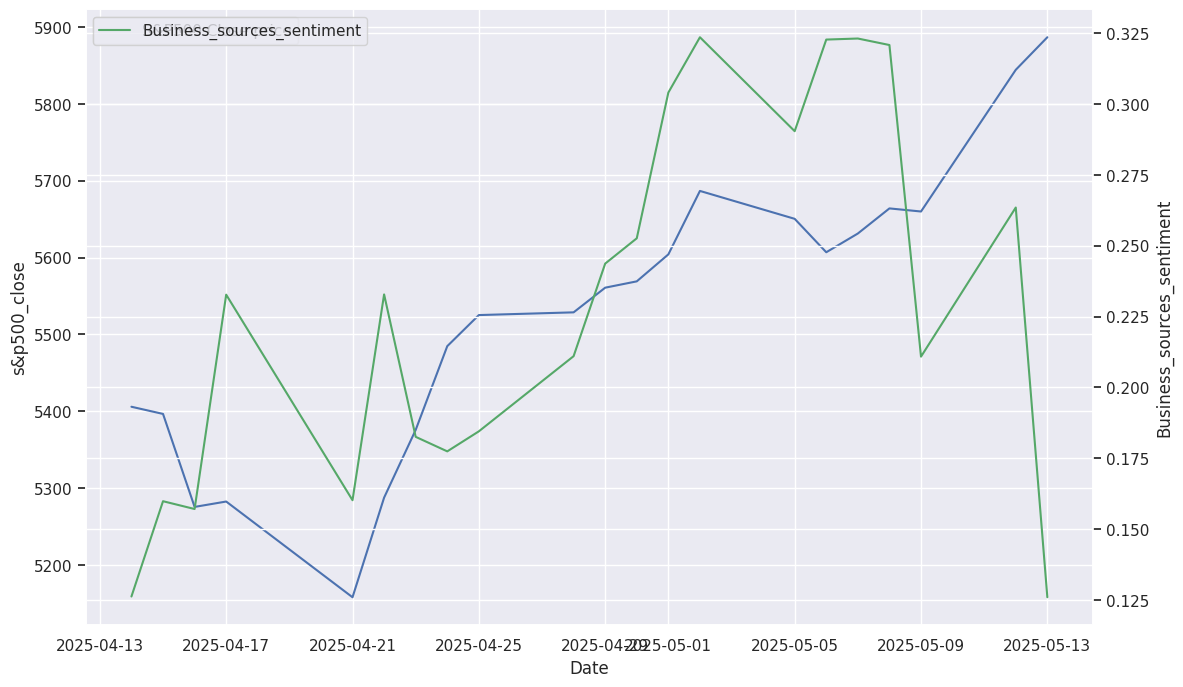

In [53]:
sns.set(rc={'figure.figsize':(13.0,8.0)})
ax=sns.lineplot(data=sentiments_vs_snp['s&p500_close'], color="b", label='S&P500 Close price')
ax2 = plt.twinx()
sns.lineplot(data=sentiments_vs_snp["Business_sources_sentiment"], color="g", ax=ax2, label='Business_sources_sentiment')